GRIB

https://docs.xarray.dev/en/stable/examples/ERA5-GRIB-example.html

This notebook is intended for downloading ERA5 (regular/old) data

Kernel: era5_env

In [2]:
import cdsapi
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import ecmwflibs
import cfgrib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime

In [3]:
path = r'C:\Users\trygg\Documents\Master_project\Data\ERA5\Download'
name = 'ERA5-land_snow_depth_Test2024'
path_name = path + '\\' + name + '.grib'

In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'grib',
        'year': '2023',
        'month': '12',
        'day': '03',
        'time': '08:00',
        'area': [
            70, 10, 54,
            25,
        ],
        'variable': 'snow_depth',
    },
    'download.grib')

2024-03-11 21:05:28,516 INFO Welcome to the CDS
2024-03-11 21:05:28,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-03-11 21:05:28,719 INFO Request is queued
2024-03-11 22:07:59,784 INFO Request is completed
2024-03-11 22:07:59,807 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/adaptor.mars.internal-1710191210.839012-10112-7-408b8a8b-64d6-49e8-aad9-faf87f013d99.grib to download.grib (11.8K)
2024-03-11 22:08:00,290 INFO Download rate 24.6K/s


Result(content_length=12120,content_type=application/x-grib,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/adaptor.mars.internal-1710191210.839012-10112-7-408b8a8b-64d6-49e8-aad9-faf87f013d99.grib)

In [4]:
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': [
            'snow_density', 'snow_depth',
        ],
        'year': '2023',
        'month': [
            '01',
        ],
        'day': ['01'],
        'time': '05:00',
        'area': [
            70, 10, 54,
            25,
        ],
    },
    path_name)
print('done')
print(path_name)

2024-03-11 20:46:35,186 INFO Welcome to the CDS
2024-03-11 20:46:35,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-03-11 20:46:35,298 INFO Request is queued


In [3]:
grib_file_path = path_name
ds = xr.load_dataset(grib_file_path, engine="cfgrib")

Can't create file 'C:\\Users\\trygg\\Documents\\Master_project\\Data\\ERA5-regular\\download\\ERA5-land_snow_depth_2023_01-03_1-10.grib.923a8.idx'
Traceback (most recent call last):
  File "c:\Users\trygg\anaconda3\envs\era5_env\lib\site-packages\cfgrib\messages.py", line 535, in from_indexpath_or_filestream
    self = cls.from_fieldset(filestream, index_keys, computed_keys)
  File "c:\Users\trygg\anaconda3\envs\era5_env\lib\site-packages\cfgrib\messages.py", line 378, in from_fieldset
    return cls.from_fieldset_and_iteritems(fieldset, iteritems, index_keys, computed_keys)
  File "c:\Users\trygg\anaconda3\envs\era5_env\lib\site-packages\cfgrib\messages.py", line 391, in from_fieldset_and_iteritems
    for field_id, raw_field in iteritems:
  File "c:\Users\trygg\anaconda3\envs\era5_env\lib\site-packages\cfgrib\messages.py", line 291, in __iter__
    for message in self.itervalues():
  File "c:\Users\trygg\anaconda3\envs\era5_env\lib\site-packages\cfgrib\messages.py", line 267, in iter

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\trygg\\Documents\\Master_project\\Data\\ERA5-regular\\download\\ERA5-land_snow_depth_2023_01-03_1-10.grib'

In [6]:
#calculate snow depth from density and swe

ds =  (ds.sd *1000) / ds.rsn 

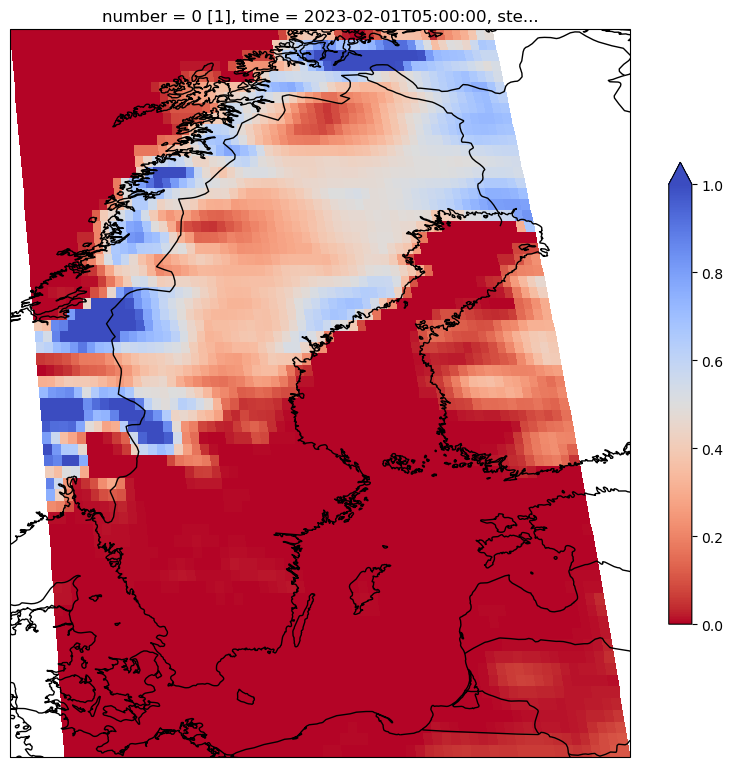

In [8]:
#modified mapview for snow depth for ERA5 classic
import cartopy
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())

ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.coastlines(resolution="10m")

nr = 10
plot = ds[nr].plot(cmap=plt.cm.coolwarm_r, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6},vmin=0, vmax=1)



c:\Users\trygg\anaconda3\envs\era5_env\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


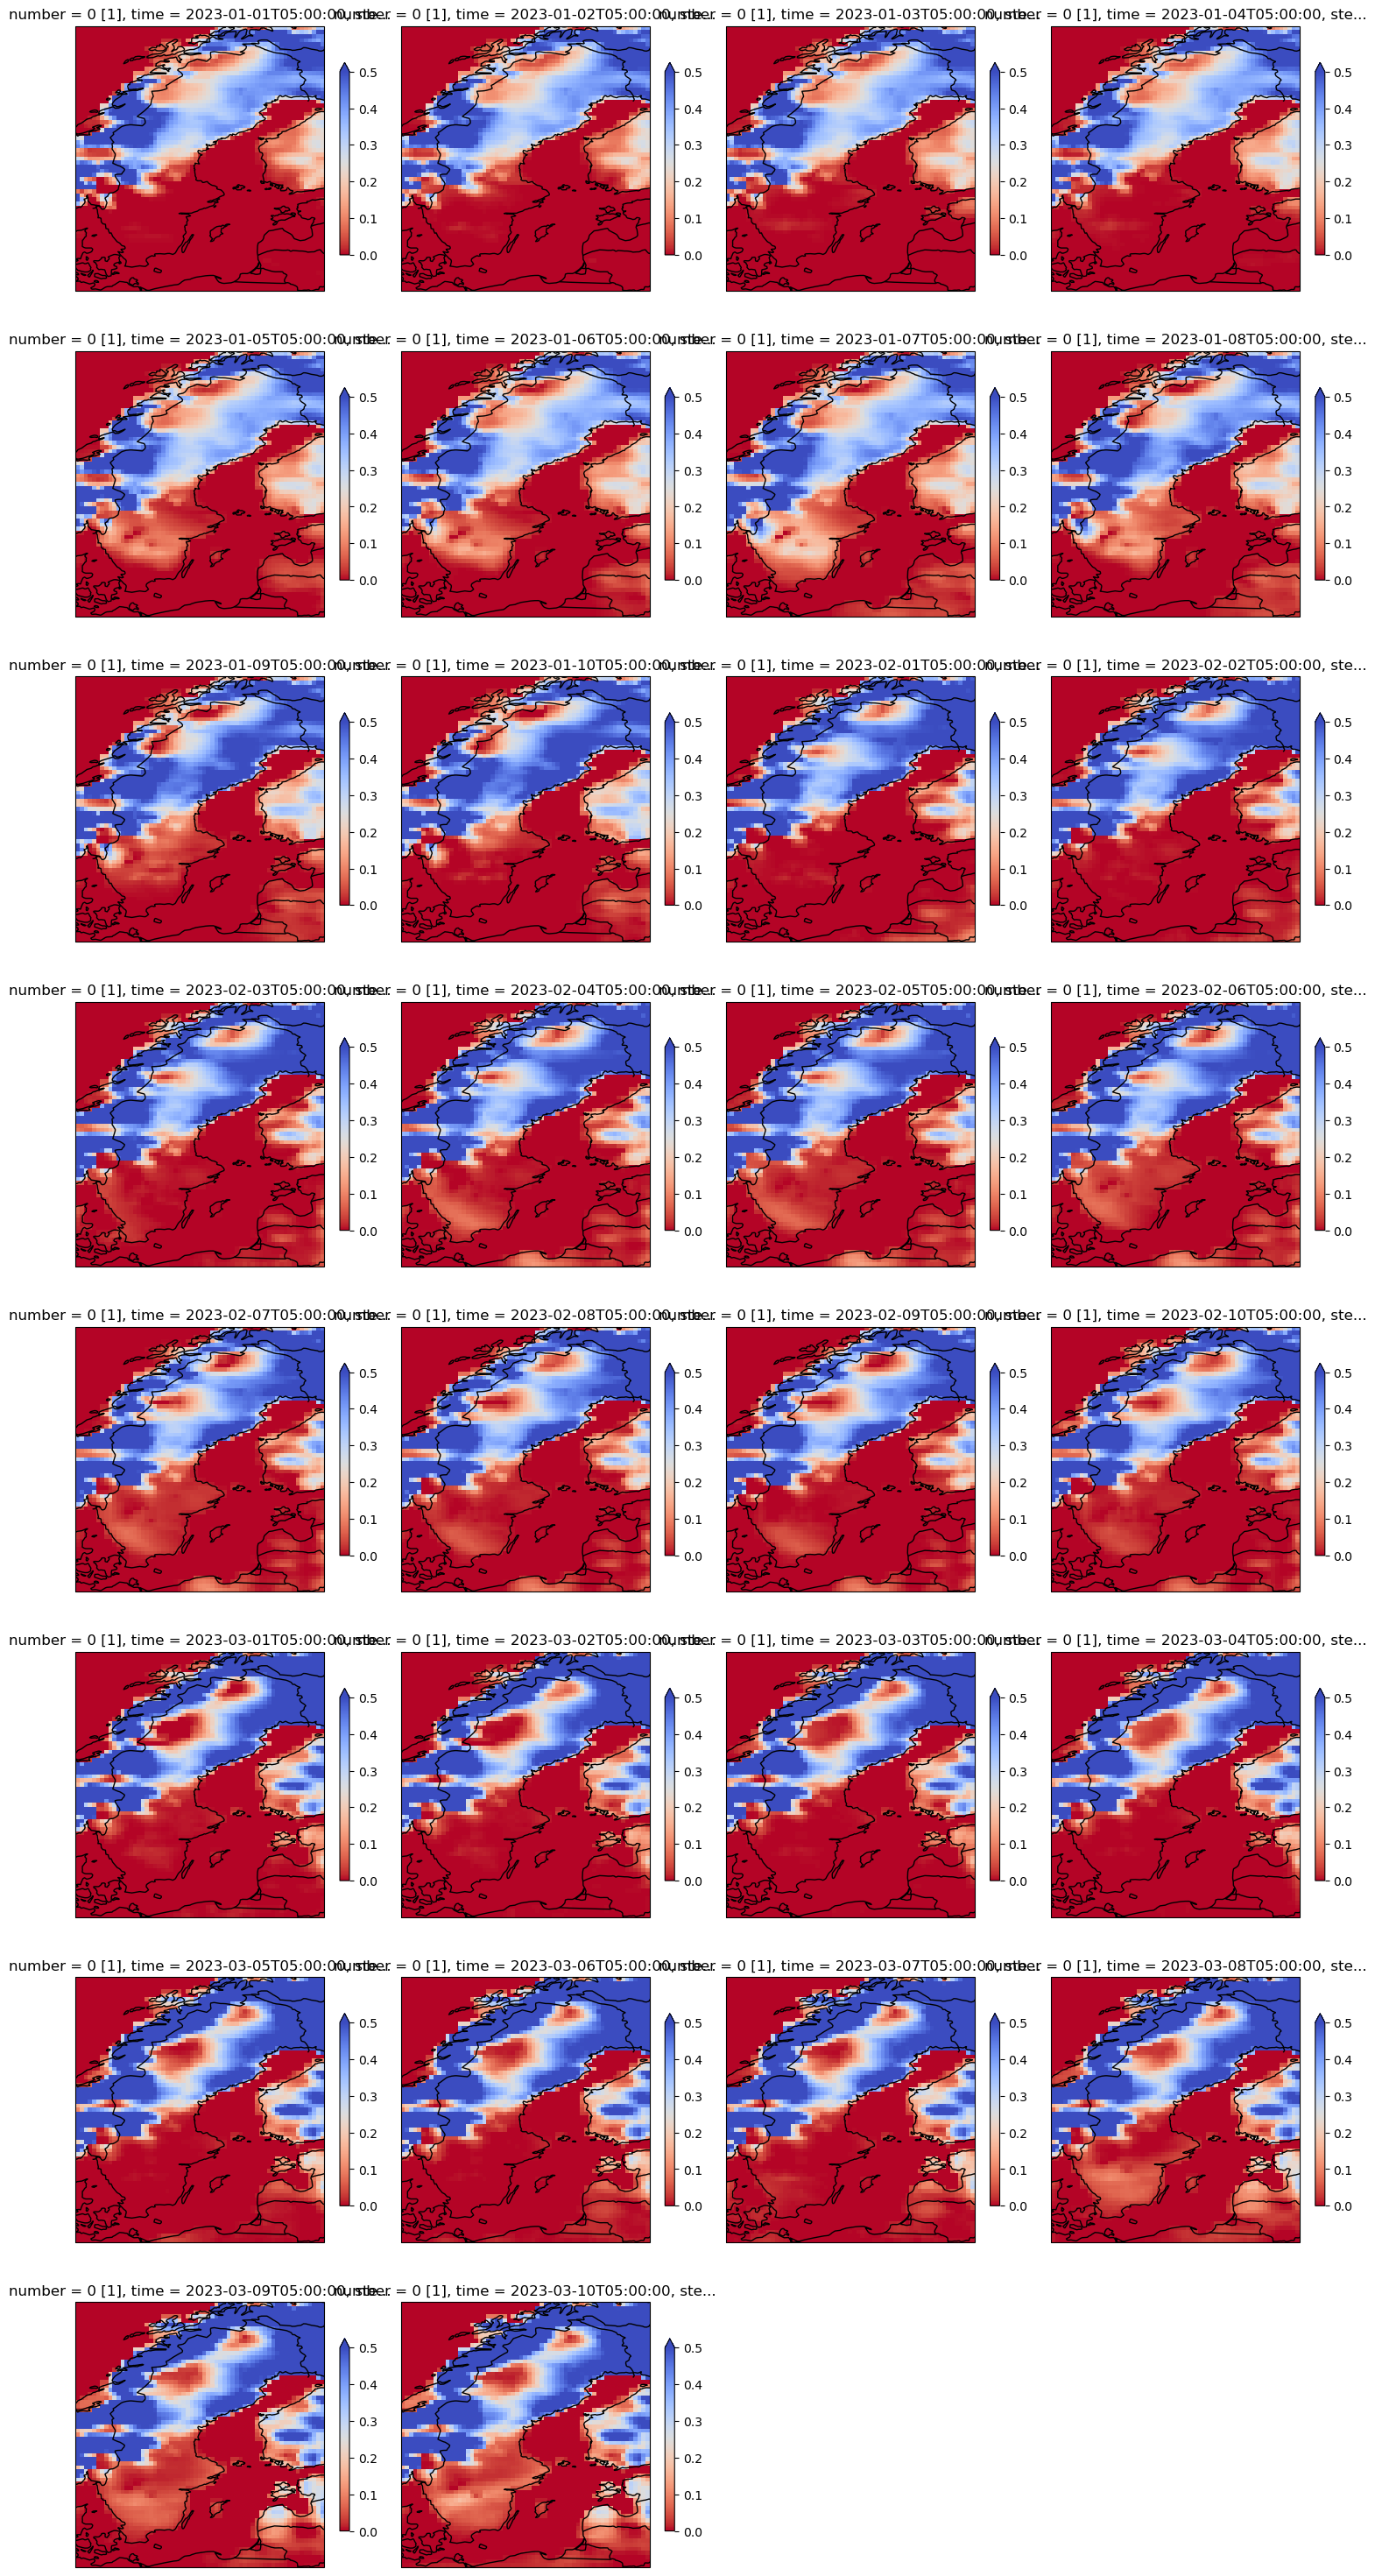

In [22]:
# Calculate the number of items and rows/cols
num_items = len(ds)

# Determine the number of columns and rows based on the number of items
num_cols = 4  # Set the desired number of columns
num_rows = (num_items + num_cols - 1) // num_cols

# Calculate the figsize dynamically based on the number of rows and columns
fig_width = 15  # Set a base width
fig_height = fig_width * num_rows / num_cols  # Calculate the height based on aspect ratio

# Create a figure without any cartopy elements for the entire plot
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data and add borders to each subplot
for i, ax in enumerate(axs.flat):
    if i < num_items:
        ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
        ax.add_feature(cfeature.COASTLINE, linestyle='-', alpha=1)
        ds[i].plot(ax=ax, cmap=plt.cm.coolwarm_r, vmin=0, vmax=0.5, cbar_kwargs={"shrink": 0.6})
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()